In [1]:
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

pd.set_option('display.max_columns', None)

In [2]:
os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/home/ukasz/Projects/CUVALLEY/cuvalleyhack2022'

In [3]:
path_to_data = 'data/zadanie3/'

In [5]:

class Parser:
    """Data parser."""

    def __init__(self, path_to_data):
        self.path = path_to_data
        self.main_file = os.path.join(self.path, 'temp_zuz.csv')
        self.subfiles = [os.path.join(self.path, "files", path) for path in os.listdir(os.path.join(self.path, 'files'))]
        
        self.data_main = None
        self.data_subfiles = []
        
        self.data_dict = {}
        self.data = None
        
        self.data_common_interval = None
        
    def load_main(self):
        self.data_main = pd.read_csv(self.main_file, header=0, sep=";")
        return self.data_main
    
    def load_subfiles(self):
        for path in self.subfiles:
            data = pd.read_csv(path, sep=",", header=0)
            self.data_subfiles.append(data)
        return self.data_subfiles
    
    def concat_subfiles(self):
        assert self.data_subfiles is not None
        self.data = pd.concat(self.data_subfiles)
        return self.data
    
    def parse_datetime(self):
        df = self.data
        df["Datetime"] = pd.to_datetime(df["czas"], utc=True, errors='coerce', format="%Y-%m-%d %H:%M:%S")
        df["Datetime"] = df["Datetime"].dt.tz_localize(None)
        df["Date"] = df["Datetime"].dt.date
        df["Time"] = df["Datetime"].dt.time
        df.set_index("Datetime", inplace=True)
        df.drop(columns=["czas"], inplace=True)
        
        # format temp data file
        self.data_main["Datetime"] = pd.to_datetime(self.data_main["Czas"], utc=True, errors='coerce', format="%Y-%m-%d %H:%M:%S")
        self.data_main["Datetime"] = self.data_main["Datetime"].dt.tz_localize(None)
        self.data_main.set_index("Datetime", inplace=True)
        self.data_main.drop(columns=["Czas"], inplace=True)
        
    def join_data(self):    
        self.data = self.data.merge(self.data_main, on="Datetime", how="left")
            

In [6]:
parser = Parser(path_to_data)
parser.load_main()

,Czas,temp_zuz
0,2020-10-01 00:00:00,1297
1,2020-10-01 01:00:00,1295
2,2020-10-01 02:00:00,1303
3,2020-10-01 02:30:00,1302
4,2020-10-01 03:00:00,1303
...,...,...
11379,2022-01-31 20:00:00,1305
11380,2022-01-31 21:00:00,1304
11381,2022-01-31 22:00:00,1308
11382,2022-01-31 23:00:00,1309


In [7]:
parser.load_subfiles()
parser.concat_subfiles()
parser.parse_datetime()
pass

In [8]:
parser.join_data()

In [9]:
parser.data.head()

,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001fir01307.daca.pv,001fir01308.daca.pv,001fir01309.daca.pv,001fir01310.daca.pv,001fir01311.daca.pv,001fir01312.daca.pv,001fir01313.daca.pv,001fir01315.daca.pv,001nir0szr0.daca.pv,001tir01357.daca.pv,001tir01358.daca.pv,001tir01359.daca.pv,001tir01360.daca.pv,001tir01361.daca.pv,001tir01362.daca.pv,001tir01363.daca.pv,001tir01365.daca.pv,001tix01063.daca.pv,001tix01064.daca.pv,001tix01065.daca.pv,001tix01066.daca.pv,001tix01067.daca.pv,001tix01068.daca.pv,001tix01069.daca.pv,001tix01070.daca.pv,001tix01071.daca.pv,001tix01072.daca.pv,001tix01073.daca.pv,001tix01074.daca.pv,001tix01075.daca.pv,001tix01076.daca.pv,001tix01077.daca.pv,001tix01078.daca.pv,001tix01079.daca.pv,001tix01080.daca.pv,001tix01081.daca.pv,001tix01082.daca.pv,001tix01083.daca.pv,001tix01084.daca.pv,001tix01085.daca.pv,001tix01086.daca.pv,001txi01153.daca.pv,001txi01154.daca.pv,001uxm0rf01.daca.pv,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,Date,Time,temp_zuz
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-16 23:00:00,56.641324,62.832217,10.982760,25.033345,106.829094,111.394178,109.130400,107.133599,106.056969,102.096200,141.779929,107.019376,22.159200,27.568620,27.349881,28.108465,29.014251,31.920324,32.459613,31.231011,27.559335,387.620546,417.085909,452.140501,430.711764,405.782473,407.748564,382.528137,375.191956,399.160311,420.985175,463.949134,407.033942,463.131326,451.827131,390.179086,411.004798,426.210266,420.406616,471.405457,403.559939,430.423776,467.993958,373.837623,400.378786,15.857480,15.910000,92.143738,92.079521,92.400359,25.135305,25.046864,4.32,8.26,9.04,4.3,9.88,2020-11-16,23:00:00,1303.0
2020-11-16 23:01:00,56.686783,62.992741,10.952379,25.216889,106.883483,111.427939,109.166232,107.125213,106.158890,101.991099,141.725941,106.937608,22.127687,27.569686,27.351160,28.108945,29.015423,31.907347,32.428238,31.230452,27.560837,387.619694,417.085483,452.141355,430.710911,405.781620,407.748990,382.528137,375.191956,399.159885,420.983896,463.947855,407.032663,463.129194,451.823718,390.177380,411.003519,426.210266,420.406616,471.405884,403.559086,430.422070,467.993530,373.836344,400.378360,15.870896,15.927679,92.143653,92.079479,92.400402,25.136183,25.048570,4.32,8.26,9.04,4.3,9.88,2020-11-16,23:01:00,NaN
2020-11-16 23:02:00,56.208104,63.114180,11.017712,25.821258,106.934659,111.406191,109.203345,107.092378,106.106489,102.040327,141.808939,107.018704,22.146874,27.570752,27.352440,28.109424,29.016596,31.884320,32.396863,31.229892,27.562338,387.618840,417.085057,452.142210,430.710057,405.780766,407.749416,382.528137,375.191956,399.159458,420.982617,463.946576,407.031384,463.127061,451.820305,390.175675,411.002240,426.210266,420.406616,471.406311,403.558232,430.420365,467.993103,373.835065,400.377934,15.884313,15.945359,92.143567,92.079436,92.400445,25.137062,25.050275,4.32,8.26,9.04,4.3,9.88,2020-11-16,23:02:00,NaN
2020-11-16 23:03:00,56.936154,63.516836,10.997920,24.935931,106.989583,111.474679,109.194616,107.110826,106.160935,102.125630,141.823656,106.991154,22.248498,27.571818,27.353719,28.109904,29.017768,31.861292,32.365488,31.229332,27.563839,387.617986,417.084630,452.143063,430.709203,405.779912,407.749842,382.528137,375.191956,399.159032,420.981338,463.945297,407.030105,463.124928,451.816892,390.173971,411.000961,426.210266,420.406616,471.406738,403.557378,430.418660,467.992676,373.833786,400.377508,15.897730,15.963038,92.143482,92.079393,92.400487,25.137940,25.051981,4.32,8.26,9.04,4.3,9.88,2020-11-16,23:03:00,NaN
2020-11-16 23:04:00,57.427780,62.798877,11.028920,24.553249,106.977945,111.455019,109.177229,107.131746,106.129841,101.999033,141.815148,107.055678,22.352838,27.572885,27.354998,28.110384,29.018940,31.838264,32.334113,31.228772,27.565341,387.617133,417.084204,452.143917,430.708350,405.779059,407.750269,382.528137,375.191956,399.158605,420.980059,463.944018,4

In [10]:
parser.data.describe()

,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001fir01307.daca.pv,001fir01308.daca.pv,001fir01309.daca.pv,001fir01310.daca.pv,001fir01311.daca.pv,001fir01312.daca.pv,001fir01313.daca.pv,001fir01315.daca.pv,001nir0szr0.daca.pv,001tir01357.daca.pv,001tir01358.daca.pv,001tir01359.daca.pv,001tir01360.daca.pv,001tir01361.daca.pv,001tir01362.daca.pv,001tir01363.daca.pv,001tir01365.daca.pv,001tix01063.daca.pv,001tix01064.daca.pv,001tix01065.daca.pv,001tix01066.daca.pv,001tix01067.daca.pv,001tix01068.daca.pv,001tix01069.daca.pv,001tix01070.daca.pv,001tix01071.daca.pv,001tix01072.daca.pv,001tix01073.daca.pv,001tix01074.daca.pv,001tix01075.daca.pv,001tix01076.daca.pv,001tix01077.daca.pv,001tix01078.daca.pv,001tix01079.daca.pv,001tix01080.daca.pv,001tix01081.daca.pv,001tix01082.daca.pv,001tix01083.daca.pv,001tix01084.daca.pv,001tix01085.daca.pv,001tix01086.daca.pv,001txi01153.daca.pv,001txi01154.daca.pv,001uxm0rf01.daca.pv,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,temp_zuz
count,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,702780.000000,11381.000000
mean,52.109009,52.564702,7.444278,23.770076,106.161032,108.633379,109.399251,108.762423,108.449101,107.640226,141.233981,108.143144,19.146554,26.637714,26.499301,27.049656,28.219185,31.530751,31.280343,29.973479,26.801673,383.041255,410.363449,450.340562,433.764300,403.298161,404.177644,370.707055,374.288233,398.186352,420.678474,454.356133,407.591754,461.766008,454.652181,409.741157,415.321020,420.318897,424.341889,465.629045,416.514566,425.993810,467.262979,376.962269,397.699930,15.260658,15.539470,92.407459,92.488270,92.745010,24.614071,24.490706,4.631274,9.524350,8.637287,5.191939,10.828630,1303.388279
std,13.870141,14.132295,4.968071,6.983764,1.624444,4.691857,2.556738,3.154878,3.579046,5.270254,4.783439,3.740380,4.463649,0.852489,0.829697,0.895924,0.873080,1.177191,1.221425,1.255065,0.875531,7.889908,10.939469,8.180977,10.015933,6.878382,6.798124,7.412427,7.964460,8.082515,6.734097,8.293882,6.593226,6.141357,6.409665,16.807462,9.650020,9.750358,10.101155,8.440261,13.598811,9.290917,7.524655,7.373958,10.212774,8.162717,8.159580,13.412260,12.803717,13.280534,0.745220,0.747569,0.876048,2.635549,0.319662,0.519197,0.563093,7.532572
min,0.000000,0.000000,0.000000,0.000000,80.757087,85.581836,84.132755,82.686731,82.557347,77.532248,109.551016,82.844859,3.435903,23.244738,23.309512,23.799393,24.719673,26.650089,26.253286,25.841193,23.338214,329.130004,368.970943,401.398124,401.659911,374.318260,362.364218,329.697350,324.054254,329.056395,360.345055,396.484005,379.006734,424.422360,427.029111,366.234369,360.398795,363.219784,359.225703,412.500479,376.293274,377.759243,425.905208,341.046352,328.090597,-8.204955,-7.877867,-0.050984,-0.101992,-0.051185,21.557821,21.429233,2.540000,4.330000,7.450000,4.010000,9.310000,1190.000000
25%,52.048250,52.170455,0.000000,22.903493,105.314671,104.795485,108.037967,107.379703,105.619704,103.210797,140.694890,107.207526,16.506305,26.069745,25.953468,26.420069,27.676727,30.864051,30.578283,29.028431,26.197871,378.934630,404.483122,446.922589,426.810948,399.194501,400.339722,366.979399,370.039653,395.022601,417.874625,450.322251,403.637017,

In [11]:
parser.data["temp_zuz"].describe()

count    11381.000000
mean      1303.388279
std          7.532572
min       1190.000000
25%       1300.000000
50%       1304.000000
75%       1308.000000
max       1338.000000
Name: temp_zuz, dtype: float64

In [13]:
parser.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 702780 entries, 2020-11-16 23:00:00 to 2021-05-10 21:59:00
Data columns (total 60 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   001fcx00211.pv       702780 non-null  float64
 1   001fcx00221.pv       702780 non-null  float64
 2   001fcx00231.pv       702780 non-null  float64
 3   001fcx00241.pv       702780 non-null  float64
 4   001fir01307.daca.pv  702780 non-null  float64
 5   001fir01308.daca.pv  702780 non-null  float64
 6   001fir01309.daca.pv  702780 non-null  float64
 7   001fir01310.daca.pv  702780 non-null  float64
 8   001fir01311.daca.pv  702780 non-null  float64
 9   001fir01312.daca.pv  702780 non-null  float64
 10  001fir01313.daca.pv  702780 non-null  float64
 11  001fir01315.daca.pv  702780 non-null  float64
 12  001nir0szr0.daca.pv  702780 non-null  float64
 13  001tir01357.daca.pv  702780 non-null  float64
 14  001tir01358.daca.pv  702780 non-nu

## Count Duplicates

In [14]:
df = parser.data
print(len(df))
print(sum(df.duplicated(subset='prob_corg'))) 
print(sum(df.duplicated(subset='prob_s')))
print(sum(df.duplicated(subset='037tix00264.daca.pv')))
print(sum(df.duplicated(subset='prazonka_s')))
# print(sum(df.duplicated(subset='Datetime')))
print(sum(df.duplicated(subset='Date')))
print(sum(df.duplicated(subset='Time')))

702780
702602
702499
41715
702499
702291
701340


## Count Nulls

In [15]:
parser.data.isnull().sum()

001fcx00211.pv              0
001fcx00221.pv              0
001fcx00231.pv              0
001fcx00241.pv              0
001fir01307.daca.pv         0
001fir01308.daca.pv         0
001fir01309.daca.pv         0
001fir01310.daca.pv         0
001fir01311.daca.pv         0
001fir01312.daca.pv         0
001fir01313.daca.pv         0
001fir01315.daca.pv         0
001nir0szr0.daca.pv         0
001tir01357.daca.pv         0
001tir01358.daca.pv         0
001tir01359.daca.pv         0
001tir01360.daca.pv         0
001tir01361.daca.pv         0
001tir01362.daca.pv         0
001tir01363.daca.pv         0
001tir01365.daca.pv         0
001tix01063.daca.pv         0
001tix01064.daca.pv         0
001tix01065.daca.pv         0
001tix01066.daca.pv         0
001tix01067.daca.pv         0
001tix01068.daca.pv         0
001tix01069.daca.pv         0
001tix01070.daca.pv         0
001tix01071.daca.pv         0
001tix01072.daca.pv         0
001tix01073.daca.pv         0
001tix01074.daca.pv         0
001tix0107

In [16]:
print(len(parser.data))
print(parser.data["temp_zuz"].isnull().sum())
print(len(parser.data) - parser.data["temp_zuz"].isnull().sum())

702780
691399
11381


## Temperature Histogram

In [17]:
df = parser.data
df.groupby('temp_zuz')
# df.head()

In [18]:
df.dropna(subset=['temp_zuz'], inplace=True)
df

,001fcx00211.pv,001fcx00221.pv,001fcx00231.pv,001fcx00241.pv,001fir01307.daca.pv,001fir01308.daca.pv,001fir01309.daca.pv,001fir01310.daca.pv,001fir01311.daca.pv,001fir01312.daca.pv,001fir01313.daca.pv,001fir01315.daca.pv,001nir0szr0.daca.pv,001tir01357.daca.pv,001tir01358.daca.pv,001tir01359.daca.pv,001tir01360.daca.pv,001tir01361.daca.pv,001tir01362.daca.pv,001tir01363.daca.pv,001tir01365.daca.pv,001tix01063.daca.pv,001tix01064.daca.pv,001tix01065.daca.pv,001tix01066.daca.pv,001tix01067.daca.pv,001tix01068.daca.pv,001tix01069.daca.pv,001tix01070.daca.pv,001tix01071.daca.pv,001tix01072.daca.pv,001tix01073.daca.pv,001tix01074.daca.pv,001tix01075.daca.pv,001tix01076.daca.pv,001tix01077.daca.pv,001tix01078.daca.pv,001tix01079.daca.pv,001tix01080.daca.pv,001tix01081.daca.pv,001tix01082.daca.pv,001tix01083.daca.pv,001tix01084.daca.pv,001tix01085.daca.pv,001tix01086.daca.pv,001txi01153.daca.pv,001txi01154.daca.pv,001uxm0rf01.daca.pv,001uxm0rf02.daca.pv,001uxm0rf03.daca.pv,037tix00254.daca.pv,037tix00264.daca.pv,prazonka_fe,prazonka_s,prob_corg,prob_fe,prob_s,Date,Time,temp_zuz
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-11-16 23:00:00,56.641324,62.832217,10.982760,25.033345,106.829094,111.394178,109.130400,107.133599,106.056969,102.096200,141.779929,107.019376,22.159200,27.568620,27.349881,28.108465,29.014251,31.920324,32.459613,31.231011,27.559335,387.620546,417.085909,452.140501,430.711764,405.782473,407.748564,382.528137,375.191956,399.160311,420.985175,463.949134,407.033942,463.131326,451.827131,390.179086,411.004798,426.210266,420.406616,471.405457,403.559939,430.423776,467.993958,373.837623,400.378786,15.857480,15.910000,92.143738,92.079521,92.400359,25.135305,25.046864,4.32,8.26,9.04,4.30,9.88,2020-11-16,23:00:00,1303.0
2020-11-17 00:00:00,55.386685,63.045618,10.988284,23.102609,107.920613,111.655125,109.441230,107.347436,106.202820,102.117232,141.855043,107.013346,19.909164,27.657515,27.401294,28.137249,29.032256,31.966198,32.198340,31.459765,27.628872,387.617975,417.084634,452.191738,430.721376,405.804226,407.786310,382.625404,375.191956,399.183375,420.981343,463.945308,407.042271,463.100627,451.837796,390.149661,411.000972,426.234554,420.406616,471.498236,403.593854,430.394351,467.992676,373.845945,400.413983,16.273136,16.374069,92.138617,92.076959,92.402919,25.174299,25.080772,4.32,8.26,9.04,4.30,9.88,2020-11-17,00:00:00,1303.0
2020-11-17 01:00:00,57.407531,62.801981,10.905398,21.855831,107.423545,111.581849,109.426119,107.255866,106.178329,102.022338,141.788687,106.927120,23.543520,27.858949,27.295377,28.094534,29.030906,32.000744,32.064942,31.410221,27.529325,387.669169,417.110223,452.237631,430.798219,405.906627,407.837504,382.830177,375.214559,399.260203,421.058094,464.022075,407.144627,463.177425,451.888989,390.200809,411.077739,426.285686,420.409603,471.600607,403.721860,430.445499,468.018311,373.948285,400.516354,16.462069,16.484847,92.140149,92.076904,92.406713,25.035332,24.974377,4.32,8.26,9.04,4.30,9.88,2020-11-17,01:00:00,1298.0
2020-11-17 02:00:00,57.754203,62.694789,10.882946,21.726125,107.452717,111.697024,109.394204,107.267351,106.178668,102.041390,141.912196,106.970524,22.392997,27.830118,27.486143,28.241884,29.138041,32.983276,32.394304,31.430870,27.663727,387.720355,417.111503,452.263220,430.862864,405.972565,407.876542,382.986338,375.265737,399.312699,421.110550,464.074540,407.210526,463.229890,451.918607,390.215521,411.118042,426.300376,420.460796,471.680588,403.776886,430.484506,468.031769,374.002014,400.557944,16.022945,16.150723,92.142708,92.076904,92.401428,25.221407,25.140801,4.32,8.26,9.04,4.30,9.88,2020-11-17,02:00:00,1305.0
2020-11-17 03:00:00,56.690814,62.787724,11.050701,21.867219,106.961449,111.712801,109.336019,107.339285,106.243877,102.059835,141.802846,107.064033,23.594872,27.735398,27.518036,28.392812,29.237455,33.057472,33.049101,31.489578,27.718817,387.771533,417.085914,452.288809,430.914027,405.998199,407.902146,383.088771,375.316935,399.338303,421.136155

array([[<AxesSubplot:title={'center':'temp_zuz'}>]], dtype=object)

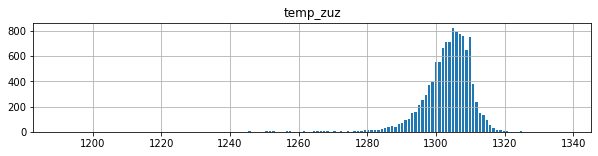

In [19]:
df.hist(column='temp_zuz', figsize=(10,2), rwidth=0.7, bins=150)

## Correlation Matrix

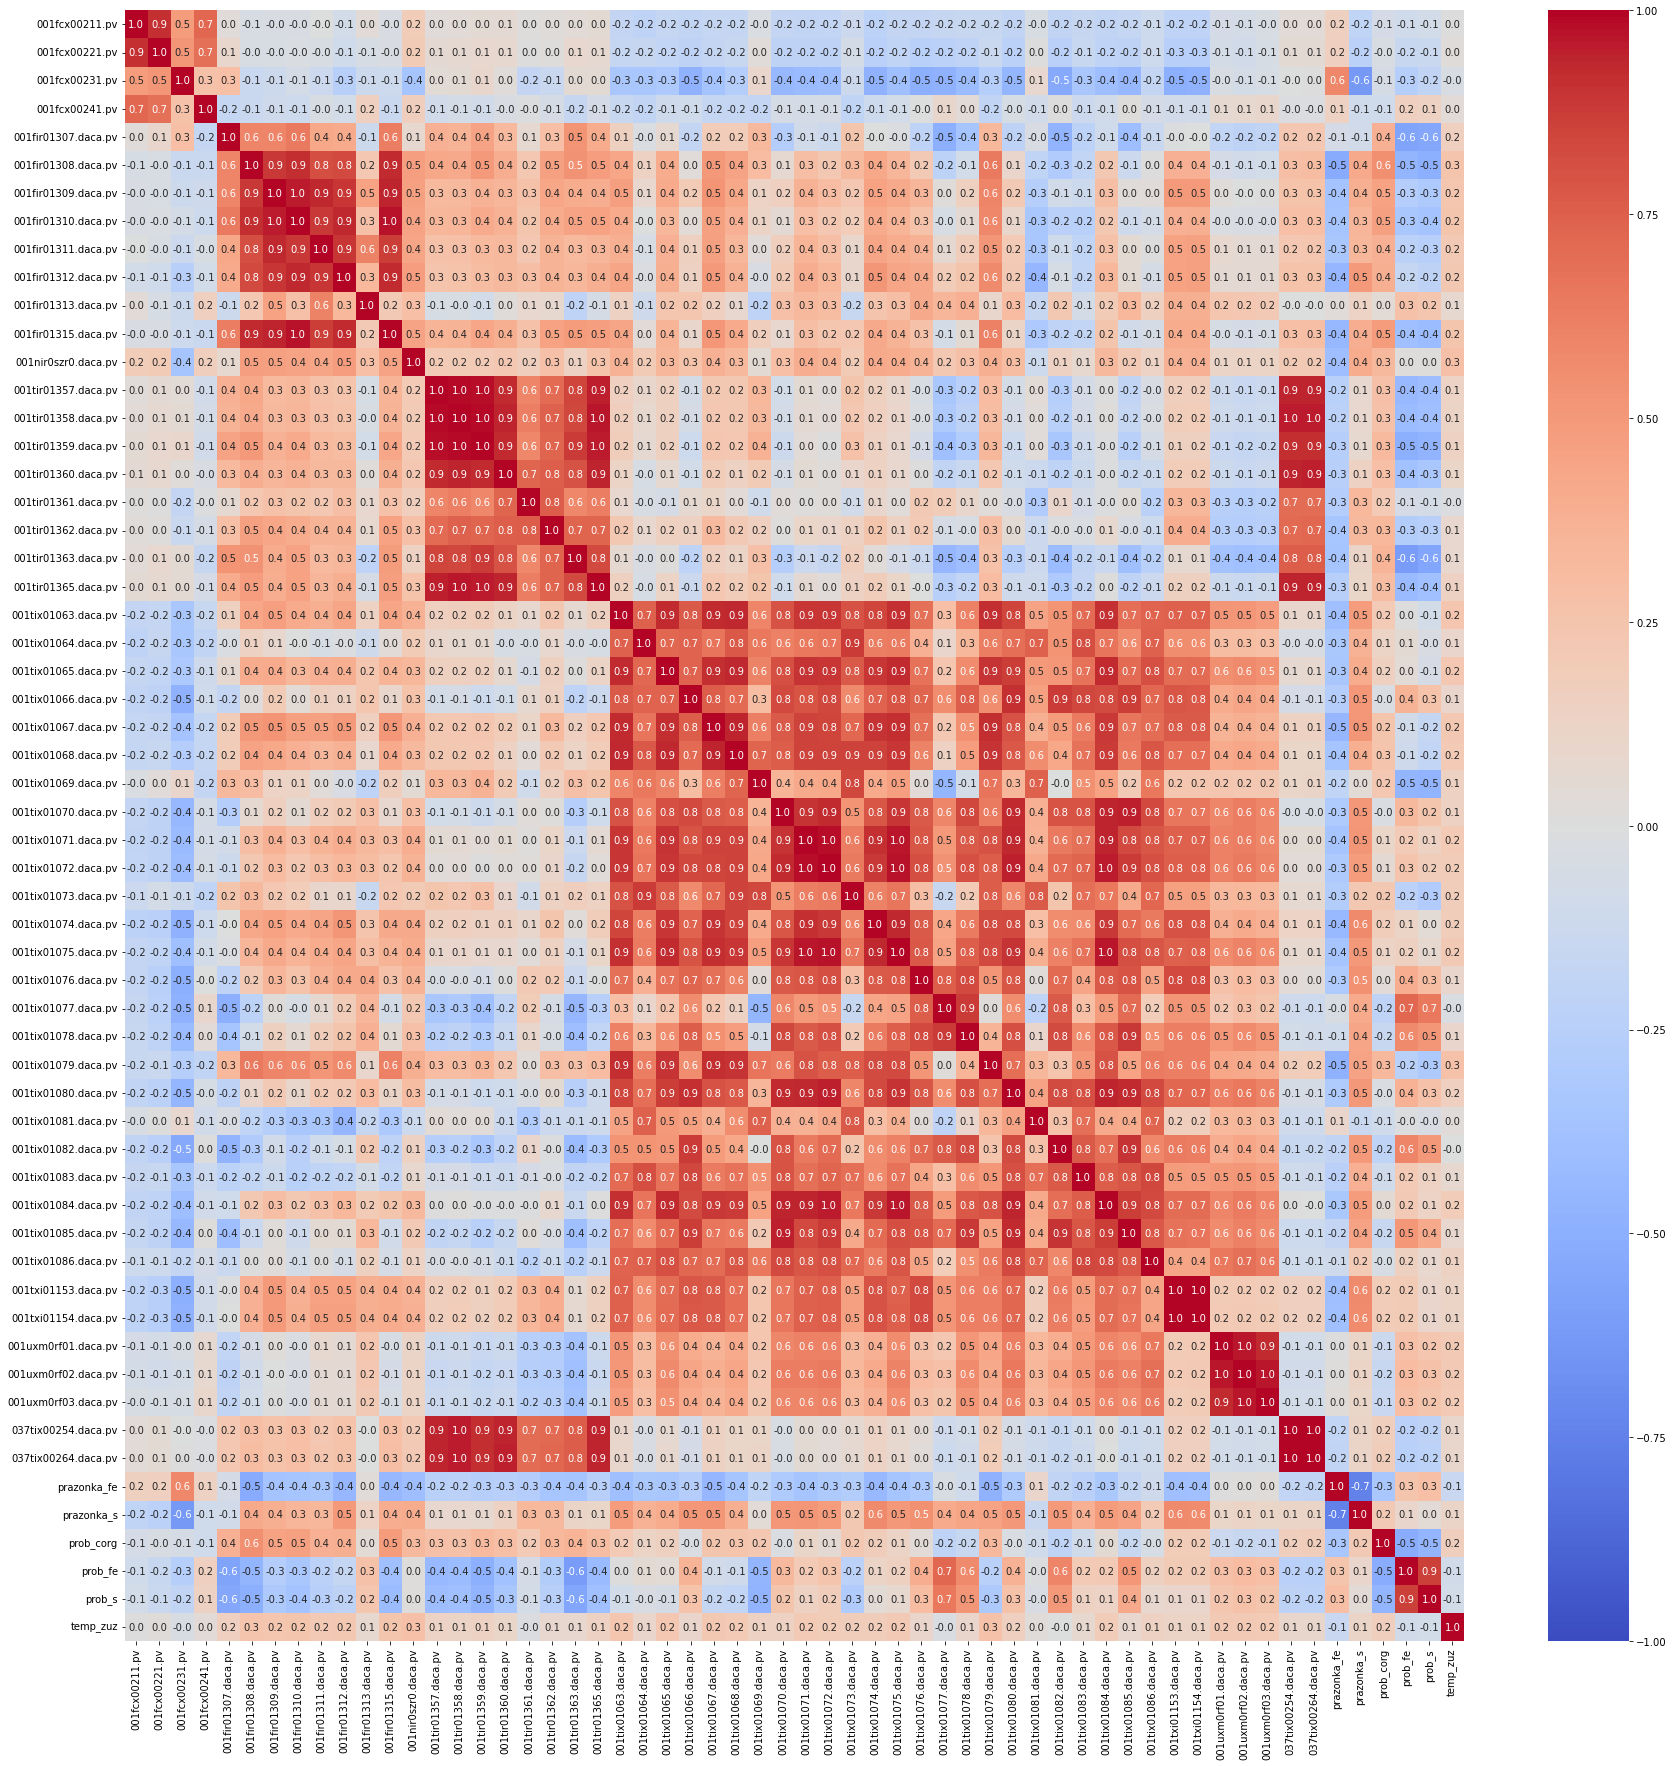

In [20]:
corr = df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr, cmap='coolwarm', vmax=1, vmin=-1, annot=True, fmt='.1f');